In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import rcParams

import numpy as np
import seaborn as sns
import pandas as pd
import wandb

pd.set_option('display.max_columns', None)
# pd.set_option('display.max_rows', None)

In [2]:
api = wandb.Api()
entity, project = "invariance-learners", "icml2024"  # set to your entity and project 

### Find duplicated runs

In [3]:
sweep_names = [
    "vae_sweep_000_25k_0",
    "vae_sweep_000_25k_1",
    "vae_sweep_000_25k_2",
    "vae_sweep_000_37k5_0",
    "vae_sweep_000_37k5_1",
    "vae_sweep_000_37k5_2",
    "vae_sweep_000_50k_0",
    "vae_sweep_000_50k_1",
    "vae_sweep_000_50k_2",
    "vae_sweep_015_25k_0",
    "vae_sweep_015_25k_1",
    "vae_sweep_015_25k_2",
    "vae_sweep_015_37k5_0",
    "vae_sweep_015_37k5_1",
    "vae_sweep_015_37k5_2",
    "vae_sweep_015_50k_0",
    "vae_sweep_015_50k_1",
    "vae_sweep_015_50k_2",
    "vae_sweep_090_25k_0",
    "vae_sweep_090_25k_1",
    "vae_sweep_090_25k_2",
    "vae_sweep_090_37k5_0",
    "vae_sweep_090_37k5_1",
    "vae_sweep_090_37k5_2",
    "vae_sweep_090_50k_0",
    "vae_sweep_090_50k_1",
    "vae_sweep_090_50k_2",
    "vae_sweep_180_25k_0",
    "vae_sweep_180_25k_1",
    "vae_sweep_180_25k_2",
    "vae_sweep_180_37k5_0",
    "vae_sweep_180_37k5_1",
    "vae_sweep_180_37k5_2",
    "vae_sweep_180_50k_0",
    "vae_sweep_180_50k_1",
    "vae_sweep_180_50k_2",
    "augvae_sweep_000_25k_0",
    "augvae_sweep_000_25k_1",
    "augvae_sweep_000_25k_2",
    "augvae_sweep_000_37k5_0",
    "augvae_sweep_000_37k5_1",
    "augvae_sweep_000_37k5_2",
    "augvae_sweep_000_50k_0",
    "augvae_sweep_000_50k_1",
    "augvae_sweep_000_50k_2",
    "augvae_sweep_015_25k_0",
    "augvae_sweep_015_25k_1",
    "augvae_sweep_015_25k_2",
    "augvae_sweep_015_37k5_0",
    "augvae_sweep_015_37k5_1",
    "augvae_sweep_015_37k5_2",
    "augvae_sweep_015_50k_0",
    "augvae_sweep_015_50k_1",
    "augvae_sweep_015_50k_2",
    "augvae_sweep_090_25k_0",
    "augvae_sweep_090_25k_1",
    "augvae_sweep_090_25k_2",
    "augvae_sweep_090_37k5_0",
    "augvae_sweep_090_37k5_1",
    "augvae_sweep_090_37k5_2",
    "augvae_sweep_090_50k_0",
    "augvae_sweep_090_50k_1",
    "augvae_sweep_090_50k_2",
    "augvae_sweep_180_25k_0",
    "augvae_sweep_180_25k_1",
    "augvae_sweep_180_25k_2",
    "augvae_sweep_180_37k5_0",
    "augvae_sweep_180_37k5_1",
    "augvae_sweep_180_37k5_2",
    "augvae_sweep_180_50k_0",
    "augvae_sweep_180_50k_1",
    "augvae_sweep_180_50k_2",
    "invvae_sweep_000_25k_0",
    "invvae_sweep_000_25k_1",
    "invvae_sweep_000_25k_2",
    "invvae_sweep_000_37k5_0",
    "invvae_sweep_000_37k5_1",
    "invvae_sweep_000_37k5_2",
    "invvae_sweep_000_50k_0",
    "invvae_sweep_000_50k_1",
    "invvae_sweep_000_50k_2",
    "invvae_sweep_015_25k_0",
    "invvae_sweep_015_25k_1",
    "invvae_sweep_015_25k_2",
    "invvae_sweep_015_37k5_0",
    "invvae_sweep_015_37k5_1",
    "invvae_sweep_015_37k5_2",
    "invvae_sweep_015_50k_0",
    "invvae_sweep_015_50k_1",
    "invvae_sweep_015_50k_2",
    "invvae_sweep_090_25k_0",
    "invvae_sweep_090_25k_1",
    "invvae_sweep_090_25k_2",
    "invvae_sweep_090_37k5_0",
    "invvae_sweep_090_37k5_1",
    "invvae_sweep_090_37k5_2",
    "invvae_sweep_090_50k_0",
    "invvae_sweep_090_50k_1",
    "invvae_sweep_090_50k_2",
    "invvae_sweep_180_25k_0",
    "invvae_sweep_180_25k_1",
    "invvae_sweep_180_25k_2",
    "invvae_sweep_180_37k5_0",
    "invvae_sweep_180_37k5_1",
    "invvae_sweep_180_37k5_2",
    "invvae_sweep_180_50k_0",
    "invvae_sweep_180_50k_1",
    "invvae_sweep_180_50k_2",
    #
    "vae_sweep_000_12k5_0",
    "vae_sweep_000_12k5_1",
    "vae_sweep_000_12k5_2",
    "vae_sweep_015_12k5_0",
    "vae_sweep_015_12k5_1",
    "vae_sweep_015_12k5_2",
    "vae_sweep_090_12k5_0",
    "vae_sweep_090_12k5_1",
    "vae_sweep_090_12k5_2",
    "vae_sweep_180_12k5_0",
    "vae_sweep_180_12k5_1",
    "vae_sweep_180_12k5_2",
    "invvae_sweep_000_12k5_0",
    "invvae_sweep_000_12k5_1",
    "invvae_sweep_000_12k5_2",
    "invvae_sweep_015_12k5_0",
    "invvae_sweep_015_12k5_1",
    "invvae_sweep_015_12k5_2",
    "invvae_sweep_090_12k5_0",
    "invvae_sweep_090_12k5_1",
    "invvae_sweep_090_12k5_2",
    "invvae_sweep_180_12k5_0",
    "invvae_sweep_180_12k5_1",
    "invvae_sweep_180_12k5_2",
    "augvae_sweep_000_12k5_0",
    "augvae_sweep_000_12k5_1",
    "augvae_sweep_000_12k5_2",
    "augvae_sweep_015_12k5_0",
    "augvae_sweep_015_12k5_1",
    "augvae_sweep_015_12k5_2",
    "augvae_sweep_090_12k5_0",
    "augvae_sweep_090_12k5_1",
    "augvae_sweep_090_12k5_2",
    "augvae_sweep_180_12k5_0",
    "augvae_sweep_180_12k5_1",
    "augvae_sweep_180_12k5_2",
    #
    "vae_wsda_sweep_000_12k5_0",
    "vae_wsda_sweep_015_12k5_0",
    "vae_wsda_sweep_090_12k5_0",
    "vae_wsda_sweep_180_12k5_0",
    "vae_wsda_sweep_000_25k_0",
    "vae_wsda_sweep_015_25k_0",
    "vae_wsda_sweep_090_25k_0",
    "vae_wsda_sweep_180_25k_0",
    "vae_wsda_sweep_000_37k5_0",
    "vae_wsda_sweep_015_37k5_0",
    "vae_wsda_sweep_090_37k5_0",
    "vae_wsda_sweep_180_37k5_0",
    "vae_wsda_sweep_000_50k_0",
    "vae_wsda_sweep_015_50k_0",
    "vae_wsda_sweep_090_50k_0",
    "vae_wsda_sweep_180_50k_0",
    "vae_wsda_sweep_000_12k5_1",
    "vae_wsda_sweep_015_12k5_1",
    "vae_wsda_sweep_090_12k5_1",
    "vae_wsda_sweep_180_12k5_1",
    "vae_wsda_sweep_000_25k_1",
    "vae_wsda_sweep_015_25k_1",
    "vae_wsda_sweep_090_25k_1",
    "vae_wsda_sweep_180_25k_1",
    "vae_wsda_sweep_000_37k5_1",
    "vae_wsda_sweep_015_37k5_1",
    "vae_wsda_sweep_090_37k5_1",
    "vae_wsda_sweep_180_37k5_1",
    "vae_wsda_sweep_000_50k_1",
    "vae_wsda_sweep_015_50k_1",
    "vae_wsda_sweep_090_50k_1",
    "vae_wsda_sweep_180_50k_1",
    "vae_wsda_sweep_000_12k5_2",
    "vae_wsda_sweep_015_12k5_2",
    "vae_wsda_sweep_090_12k5_2",
    "vae_wsda_sweep_180_12k5_2",
    "vae_wsda_sweep_000_25k_2",
    "vae_wsda_sweep_015_25k_2",
    "vae_wsda_sweep_090_25k_2",
    "vae_wsda_sweep_180_25k_2",
    "vae_wsda_sweep_000_37k5_2",
    "vae_wsda_sweep_015_37k5_2",
    "vae_wsda_sweep_090_37k5_2",
    "vae_wsda_sweep_180_37k5_2",
    "vae_wsda_sweep_000_50k_2",
    "vae_wsda_sweep_015_50k_2",
    "vae_wsda_sweep_090_50k_2",
    "vae_wsda_sweep_180_50k_2",
]

In [4]:
# create dict mapping sweep name to sweep id
sweep_id_dict = {}
for sweep in api.project(project).sweeps():
    if sweep.name in sweep_names:
        if sweep.name in sweep_id_dict:
            sweep_id = sweep_id_dict[sweep.name]
            if isinstance(sweep_id, list):
                sweep_id_dict[sweep.name].append(sweep.id)
            else:
                sweep_id_dict[sweep.name] = [sweep_id, sweep.id]
        else:
            sweep_id_dict[sweep.name] = sweep.id

{name: ids for name, ids in sweep_id_dict.items() if isinstance(ids, list)}

{'vae_wsda_sweep_015_25k_0': ['5gxsqvog', '1ajx9nfc', 'i1u7q5ks'],
 'invvae_sweep_015_12k5_0': ['137ysu9i', 'yiry8ns5'],
 'vae_sweep_015_12k5_0': ['qffcoc6c', 'f9oa5jp4'],
 'augvae_sweep_015_12k5_0': ['vcb66ttf', 'rx7czh7k'],
 'invvae_sweep_180_25k_0': ['vvefau8v', 'xi5aoj10'],
 'invvae_sweep_180_37k5_0': ['0omzniei', 'b2vsbjo3'],
 'invvae_sweep_180_50k_0': ['h5tywea9', 'n3h6gdwd'],
 'invvae_sweep_090_25k_0': ['cu31azxh', 'pg1g78kl'],
 'invvae_sweep_090_50k_0': ['5xxw7qnp', 'yz6eq3n5'],
 'invvae_sweep_090_37k5_0': ['qtm32k86', 'runnu1l6'],
 'invvae_sweep_015_25k_0': ['7rsugqlf', 'x0u5fasy'],
 'invvae_sweep_015_37k5_0': ['vbwr4l3r', '2ofkn2pd'],
 'invvae_sweep_015_50k_0': ['ffftoapj', 'vxbnl83p'],
 'invvae_sweep_000_25k_0': ['qs48qmd1', '5p99tunr', 'zon0va0n'],
 'invvae_sweep_000_37k5_0': ['d1hqewgp', 'oqf7rhmb', 'g9oaipeb'],
 'invvae_sweep_000_50k_0': ['pymico1b', '8yfktqeo', '3qr7o0l2'],
 'vae_sweep_180_25k_0': ['nlh5fv06', 'vse9smaw'],
 'vae_sweep_180_50k_0': ['lutna5ui', '1tjwit5m']

manually select the duplicated run IDs:

In [5]:
sweep_id_dict['vae_sweep_180_25k_0'] = 'nlh5fv06'
sweep_id_dict['vae_sweep_180_50k_0'] = 'lutna5ui'
sweep_id_dict['vae_sweep_000_25k_0'] = 'qmaclyvd'
sweep_id_dict['vae_sweep_000_50k_0'] = 'ob9dj76y'
sweep_id_dict['augvae_sweep_180_25k_0'] = 'o5jef5mf'
sweep_id_dict['augvae_sweep_180_50k_0'] = '5bwwl087'
sweep_id_dict['augvae_sweep_000_25k_0'] = 'qp2z5kj6'
sweep_id_dict['augvae_sweep_000_50k_0'] = '84ionfmm'
sweep_id_dict['invvae_sweep_180_25k_0'] = 'vvefau8v'
sweep_id_dict['invvae_sweep_180_37k5_0'] = '0omzniei'
sweep_id_dict['invvae_sweep_180_50k_0'] = 'h5tywea9'
sweep_id_dict['invvae_sweep_090_25k_0'] = 'cu31azxh'
sweep_id_dict['invvae_sweep_090_50k_0'] = '5xxw7qnp'
sweep_id_dict['invvae_sweep_090_37k5_0'] = 'qtm32k86'
sweep_id_dict['invvae_sweep_015_25k_0'] = '7rsugqlf'
sweep_id_dict['invvae_sweep_015_37k5_0'] = 'vbwr4l3r'
sweep_id_dict['invvae_sweep_015_50k_0'] = 'ffftoapj'
sweep_id_dict['invvae_sweep_000_25k_0'] = 'qs48qmd1'
sweep_id_dict['invvae_sweep_000_37k5_0'] = 'd1hqewgp'
sweep_id_dict['invvae_sweep_000_50k_0'] = 'pymico1b'

sweep_id_dict['augvae_sweep_015_12k5_0'] = 'rx7czh7k'
sweep_id_dict['vae_sweep_015_12k5_0'] = 'f9oa5jp4'
sweep_id_dict['invvae_sweep_015_12k5_0'] = 'yiry8ns5'

sweep_id_dict['vae_wsda_sweep_015_25k_0'] = '5gxsqvog'

{name: ids for name, ids in sweep_id_dict.items() if isinstance(ids, list)}

{}

### Get run data

In [6]:
entity, project, sweep_id

('invariance-learners', 'icml2024', ['ob9dj76y', 'elzqyq9c', 'lb99ocz5'])

In [7]:
summary_list, config_list, name_list, tags, ids, states, sweeps, sweep_ids = [], [], [], [], [], [],  [], []

for sweep, sweep_id in sweep_id_dict.items():
    runs = api.sweep(entity + "/" + project + "/" + sweep_id).runs

    for run in runs: 
        # .summary contains the output keys/values for metrics like accuracy.
        #  We call ._json_dict to omit large files 
        summary_list.append(run.summary._json_dict)

        # .config contains the hyperparameters.
        #  We remove special values that start with _.
        config_list.append(
            {k: v for k,v in run.config.items()
            if not k.startswith('_')})

        # .name is the human-readable name of the run.
        name_list.append(run.name)

        tags.append(run.tags)

        ids.append(run.id)

        states.append(run.state)

        sweeps.append(sweep)

        sweep_ids.append(sweep_id)

runs_df = pd.DataFrame({
    "summary": summary_list,
    "config": config_list,
    "name": name_list,
    "tags": tags,
    "id": ids,
    "state": states,
    "sweep": sweeps,
    "sweep_id": sweep_ids,
    })

runs_df

,summary,config,name,tags,id,state,sweep,sweep_id
0,"{'train/elbo': 746.5555419921875, 'train/loss'...","{'lr': 0.009, 'seed': 2, 'angle': 180, 'model'...",efficient-sweep-31,[],jrm1b7v3,finished,vae_wsda_sweep_180_12k5_2,hb1cfsl1
1,"{'valid/elbo': 895.2733154296875, 'valid/x_mse...","{'lr': 0.009, 'seed': 2, 'angle': 180, 'model'...",fancy-sweep-32,[],0t75724e,finished,vae_wsda_sweep_180_12k5_2,hb1cfsl1
2,"{'test/iwlb': 1020.4584350585938, 'test/loss':...","{'lr': 0.009, 'seed': 2, 'angle': 180, 'model'...",copper-sweep-36,[],w2fzinjx,finished,vae_wsda_sweep_180_12k5_2,hb1cfsl1
3,"{'lr': 8.99999918146932e-07, 'β': 1, 'test/iwl...","{'lr': 0.009, 'seed': 2, 'angle': 180, 'model'...",zany-sweep-33,[],s8keck8m,finished,vae_wsda_sweep_180_12k5_2,hb1cfsl1
4,"{'_wandb': {'runtime': 603}, 'test/ll': 1064.8...","{'lr': 0.009, 'seed': 2, 'angle': 180, 'model'...",super-sweep-35,[],kuoszjhg,finished,vae_wsda_sweep_180_12k5_2,hb1cfsl1
...,...,...,...,...,...,...,...,...
10795,"{'test/loss': -1002.9066772460938, 'valid/kld'...","{'lr': 0.003, 'seed': 0, 'angle': 0, 'model': ...",northern-sweep-5,[],t1jaff13,finished,augvae_sweep_000_50k_0,84ionfmm
10796,"{'valid/ll': 762.8217163085938, 'gen_plots_1':...","{'lr': 0.003, 'seed': 0, 'angle': 0, 'model': ...",distinctive-sweep-7,[],tzf4jlue,finished,augvae_sweep_000_50k_0,84ionfmm
10797,"{'test/kld': 47.13529968261719, 'train/ll': 68...","{'lr': 0.003, 'seed': 0, 'angle': 0, 'model': ...",colorful-sweep-2,[],0i62fn5o,finished,augvae_sweep_000_50k_0,84ionfmm
10798,"{'β': 1, '_step': 5000, 'test/ll': 719.2950439...","{'lr': 0.003, 'seed': 0, 'angle': 0, 'model': ...",worldly-sweep-1,[],ss2rf4o5,finished,augvae_sweep_000_50k_0,84ionfmm


In [8]:
df_expanded = runs_df.join(pd.json_normalize(runs_df['summary'], record_prefix='summary.').add_prefix('summary.')).drop('summary', axis='columns')
df_expanded = df_expanded.join(pd.json_normalize(runs_df['config'], record_prefix='config').add_prefix('config.')).drop('config', axis='columns')

df_expanded.columns

Index(['name', 'tags', 'id', 'state', 'sweep', 'sweep_id',
       'summary.train/elbo', 'summary.train/loss', 'summary.valid/elbo',
       'summary.train/x_mse',
       ...
       'config.batch_size_eval', 'config.iwlb_num_samples',
       'config.warmup_steps_pct', 'config.shuffle_buffer_size',
       'config.repeat_after_batching', 'config.β_schedule_init_value',
       'config.β_schedule_final_value', 'config.model.conv_dims',
       'config.model.dense_dims', 'config.model.latent_dim'],
      dtype='object', length=104)

In [9]:
# take only completed runs 
df_filtered = df_expanded[df_expanded['state'] == 'finished']

# take only runs where config.model.dense_dims = 256
df_filtered = df_filtered[df_filtered['config.model.dense_dims'] == '256']

# take only runs with certain tags
# tags_to_keep = ['angle_sweep', 'num_trn_sweep', 'mnist', 'vae']
# df_filtered = df_filtered[df_filtered['tags'].apply(lambda x: all(tag in x for tag in tags_to_keep))]

# take only runs without certain tags
# tags_to_remove = ['test', 'hidden', 'ssilvae']
# df_filtered = df_filtered[~df_filtered['tags'].apply(lambda x: any(tag in x for tag in tags_to_remove))]

# replace nans in config.num_trn and config.angle with -1
df_filtered['config.num_trn'] = df_filtered['config.num_trn'].fillna(-1)
df_filtered['config.angle'] = df_filtered['config.angle'].fillna(0)

df_filtered

,name,tags,id,state,sweep,sweep_id,summary.train/elbo,summary.train/loss,summary.valid/elbo,summary.train/x_mse,summary.train/ll,summary.test/iwlb,summary._timestamp,summary.β,summary._step,summary.train/iwlb,summary.valid/loss,summary.test/elbo,summary.test/loss,summary.valid/kld,summary.valid/iwlb,summary.lr,summary.test/ll,summary._runtime,summary.test/kld,summary.test/x_mse,summary.valid/x_mse,summary.valid/ll,summary.train/kld,summary.recon.path,summary.recon.size,summary.recon._type,summary.recon.width,summary.recon.format,summary.recon.height,summary.recon.sha256,summary._wandb.runtime,summary.sample.width,summary.sample.format,summary.sample.height,summary.sample.sha256,summary.sample.path,summary.sample.size,summary.sample._type,summary.inf_plots_0.size,summary.inf_plots_0._type,summary.inf_plots_0.width,summary.inf_plots_0.format,summary.inf_plots_0.height,summary.inf_plots_0.sha256,summary.inf_plots_0.path,summary.inf_plots_1._type,summary.inf_plots_1.width,summary.inf_plots_1.format,summary.inf_plots_1.height,summary.inf_plots_1.sha256,summary.inf_plots_1.path,summary.inf_plots_1.size,summary.gen_plots_1.path,summary.gen_plots_1.size,summary.gen_plots_1._type,summary.gen_plots_1.width,summary.gen_plots_1.format,summary.gen_plots_1.height,summary.gen_plots_1.sha256,summary.gen_plots_0.sha256,summary.gen_plots_0.path,summary.gen_plots_0.size,summary.gen_plots_0._type,summary.gen_plots_0.width,summary.gen_plots_0.format,summary.gen_plots_0.height,config.lr,config.seed,config.angle,config.steps,config.dataset,config.num_trn,config.num_val,config.pp_eval,config.shuffle,config.pp_train,config.run_iwlb,config.clip_norm,config.eval_freq,config.plot_freq,config.val_split,config.batch_size,config.model_name,config.test_split,config.train_split,config.init_lr_mult,config.weight_decay,config.final_lr_mult,config.batch_size_eval,config.iwlb_num_samples,config.warmup_steps_pct,config.shuffle_buffer_size,config.repeat_after_batching,config.β_schedule_init_value,config.β_schedule_final_value,config.model.conv_dims,config.model.dense_dims,config.model.latent_dim
0,efficient-sweep-31,[],jrm1b7v3,finished,vae_wsda_sweep_180_12k5_2,hb1cfsl1,746.555542,-746.555542,907.696960,0.225316,807.930481,941.438354,1.710797e+09,1.0,5000.0,NaN,-907.696960,918.997314,-918.997314,58.949310,NaN,8.999999e-07,977.708618,208.646695,58.711147,0.022882,0.023665,966.645935,61.374950,media/images/recon_4999_400bc8c9de37de057eb6.png,53438.0,image-file,4000.0,png,400.0,400bc8c9de37de057eb6b6bbb9dcb91493006c53f36bf4...,254.0,4000.0,png,200.0,f52e9ad22bdfd0ee3207b798d3e7cadb30853c144e6f76...,media/images/sample_4999_f52e9ad22bdfd0ee3207.png,46161.0,image-file,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.009,2.0,180.0,5000,MNIST,12500.0,10000.0,"value_range(-1, 1)|random_rotate(-180, 180, fi...",preprocessed,"value_range(-1, 1)|random_rotate(-180, 180, fi...",False,2.0,0.01,0.25,train[:10000],512.0,VAE_WSDA,test,train[10000:22500],0.03,0.0001,0.0001,50.0,300.0,0.15,50000.0,True,1.0,1.0,"64,128,256",256,20
1,fancy-sweep-32,[],0t75724e,finished,vae_wsda_sweep_180_12k5_2,hb1cfsl1,738.725830,-738.725830,895.273315,0.225125,800.101929,929.543335,1.710797e+09,1.0,5000.0,NaN,-895.273315,907.560730,-907.560730,59.027592,NaN,8.999999e-07,966.303833,210.881242,58.742683,0.023204,0.024124,954.301147,61.375996,media/images/recon_4999_e4eef36a40fe92a01d35.png,53545.0,image-file,4000.0,png,400.0,e4eef36a40fe92a01d35376cd81f52339ad8c1d396a9ca...,256.0,4000.0,png,200.0,b072519e505dbee9ded94410ad780cb124ea04bf55ac8b...,media/images/sample_4999_b072519e505dbee9ded9.png,45879.0,image-file,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.009,2.0,180.0,5000,MNIST,12500.0,10000.0,"value_range(-1, 1)|random_rotate(-180, 180, fi...",preprocessed,"value_range(-1, 1)|random_rotate(-180, 180, fi...",False,2.0,0.01,0.25,train[:10000],512.0,VAE_WSDA,test,tra

In [10]:
df_filtered['config.angle'].unique()

array([180.,  90.,  15.,   0.])

In [11]:
df_filtered['config.num_trn'].unique()

array([12500., 25000., 50000., 37500.])

In [12]:
df_filtered['config.dataset'].unique()

array(['MNIST'], dtype=object)

In [13]:
df_filtered['config.model_name'].unique()

array(['VAE_WSDA', 'InvVAE', 'VAE', 'AugVAE'], dtype=object)

In [14]:
df_filtered[df_filtered['config.dataset'] != 'MNIST']

,name,tags,id,state,sweep,sweep_id,summary.train/elbo,summary.train/loss,summary.valid/elbo,summary.train/x_mse,summary.train/ll,summary.test/iwlb,summary._timestamp,summary.β,summary._step,summary.train/iwlb,summary.valid/loss,summary.test/elbo,summary.test/loss,summary.valid/kld,summary.valid/iwlb,summary.lr,summary.test/ll,summary._runtime,summary.test/kld,summary.test/x_mse,summary.valid/x_mse,summary.valid/ll,summary.train/kld,summary.recon.path,summary.recon.size,summary.recon._type,summary.recon.width,summary.recon.format,summary.recon.height,summary.recon.sha256,summary._wandb.runtime,summary.sample.width,summary.sample.format,summary.sample.height,summary.sample.sha256,summary.sample.path,summary.sample.size,summary.sample._type,summary.inf_plots_0.size,summary.inf_plots_0._type,summary.inf_plots_0.width,summary.inf_plots_0.format,summary.inf_plots_0.height,summary.inf_plots_0.sha256,summary.inf_plots_0.path,summary.inf_plots_1._type,summary.inf_plots_1.width,summary.inf_plots_1.format,summary.inf_plots_1.height,summary.inf_plots_1.sha256,summary.inf_plots_1.path,summary.inf_plots_1.size,summary.gen_plots_1.path,summary.gen_plots_1.size,summary.gen_plots_1._type,summary.gen_plots_1.width,summary.gen_plots_1.format,summary.gen_plots_1.height,summary.gen_plots_1.sha256,summary.gen_plots_0.sha256,summary.gen_plots_0.path,summary.gen_plots_0.size,summary.gen_plots_0._type,summary.gen_plots_0.width,summary.gen_plots_0.format,summary.gen_plots_0.height,config.lr,config.seed,config.angle,config.steps,config.dataset,config.num_trn,config.num_val,config.pp_eval,config.shuffle,config.pp_train,config.run_iwlb,config.clip_norm,config.eval_freq,config.plot_freq,config.val_split,config.batch_size,config.model_name,config.test_split,config.train_split,config.init_lr_mult,config.weight_decay,config.final_lr_mult,config.batch_size_eval,config.iwlb_num_samples,config.warmup_steps_pct,config.shuffle_buffer_size,config.repeat_after_batching,config.β_schedule_init_value,config.β_schedule_final_value,config.model.conv_dims,config.model.dense_dims,config.model.latent_dim


In [15]:
df_filtered.groupby(
        ['config.angle', 'config.num_trn', 'config.model_name', 'config.seed', 'config.model.latent_dim', 'sweep', 'sweep_id']).count(
        ).query("`name` != 36")

name  \
config.angle config.num_trn config.model_name config.seed config.model.latent_dim sweep                   sweep_id         
0.0          25000.0        AugVAE            0.0         20                      augvae_sweep_000_25k_0  qp2z5kj6    37   
                            InvVAE            0.0         16                      invvae_sweep_000_25k_0  qs48qmd1    35   
                                                          20                      invvae_sweep_000_25k_0  qs48qmd1    37   
             37500.0        AugVAE            2.0         16                      augvae_sweep_000_37k5_2 71d1alnj    35   
                                                          20                      augvae_sweep_000_37k5_2 71d1alnj    37   
                            InvVAE            0.0         16                      invvae_sweep_000_37k5_0 d1hqewgp    37   
                                                          20                      invvae_sweep_000_37k5_0 d1hqewgp    35   
                            VAE               2.0         16                      vae_sweep_000_37k5_2    b9pds8si    37   
                                                          20                      vae_sweep_000_37k5_2    b9pds8si    35   
             50000.0        AugVAE            2.0         16                      augvae_sweep_000_50k_2  n6a9tuhw    35   
                                                          20                      augvae_sweep_000_50k_2  n6a9tuhw    37   
                            VAE               0.0         16                      vae_sweep_000_50k_0     ob9dj76y    35   
                                                          20                      vae_sweep_000_50k_0     ob9dj76y    37   
                                              1.0         16                      vae_sweep_000_50k_1     rg3qvyjq    35   
                                                          20                      vae_sweep_000_50k_1     rg3qvyjq    37   
15.0         25000.0        AugVAE            1.0         16                      augvae_sweep_015_25k_1  idt646ke    37   
                                                          20                      augvae_sweep_015_25k_1  idt646ke    35   
                            InvVAE            0.0         16                      invvae_sweep_015_25k_0  7rsugqlf    35   
                                                          20                      invvae_sweep_015_25k_0  7rsugqlf    37   
             37500.0        AugVAE            1.0         16                      augvae_sweep_015_37k5_1 k9qmw3n5    37   
                                                          20                      augvae_sweep_015_37k5_1 k9qmw3n5    35   
                            VAE               0.0         16                      vae_sweep_015_37k5_0    78yv7jgn    35   
                                                          20                      vae_sweep_015_37k5_0    78yv7jgn    37   
                                              1.0         16                      vae_sweep_015_37k5_1    v6jqkf90    37   
                                                          20                      vae_sweep_015_37k5_1    v6jqkf90    35   
                                              2.0         16                      vae_sweep_015_37k5_2    sze1ki2a    38   
                                                          20                      vae_sweep_015_37k5_2    sze1ki2a    34   
             50000.0        AugVAE            0.0         16                      augvae_sweep_015_50k_0  lkmfic2e    37   
90.0         12500.0        VAE               1.0         20                      vae_sweep_090_12k5_1    pcue5wgh    34   
                                              2.0         20                      vae_sweep_090_12k5_2    mwjrlvks    30   
             25000.0        VAE               2.0         16                      vae_sweep_090_25k_2     wfwelkrp    37   
                        

In [16]:
df_filtered[df_filtered['config.model_name'] == 'InvVAE'].sort_values(
    by='summary.valid/elbo', ascending=False).groupby(
        ['config.angle', 'config.num_trn', 'config.model_name', 'config.seed',])[
    [
        # 'config.model.latent_dim', 'config.lr', 'config.model.conv_dims', 'config.steps', 'config.warmup_steps_pct', 
        'summary.test/elbo', 'summary.test/ll', 'summary.test/x_mse', 'summary.test/iwlb'
    ]].first()

summary.test/elbo  \
config.angle config.num_trn config.model_name config.seed                      
0.0          12500.0        InvVAE            0.0                 488.687622   
                                              1.0                 480.197327   
                                              2.0                 475.893066   
             25000.0        InvVAE            0.0                1308.851318   
                                              1.0                1310.728394   
                                              2.0                1290.395996   
             37500.0        InvVAE            0.0                1375.890625   
                                              1.0                1338.634033   
                                              2.0                1309.537598   
             50000.0        InvVAE            0.0                1383.074707   
                                              1.0                1385.022705   
                                              2.0                1393.594971   
15.0         12500.0        InvVAE            0.0                 496.776062   
                                              1.0                 539.734131   
                                              2.0                 530.033936   
             25000.0        InvVAE            0.0                1739.654297   
                                              1.0                1770.303833   
                                              2.0                1695.435059   
             37500.0        InvVAE            0.0                1766.488892   
                                              1.0                1770.460449   
                                              2.0                1759.235718   
             50000.0        InvVAE            0.0                1800.786743   
                                              1.0                1782.231689   
                                              2.0                1779.032471   
90.0         12500.0        InvVAE            0.0                 502.762909   
                                              1.0                 539.585999   
                                              2.0                 496.038635   
             25000.0        InvVAE            0.0                1721.524048   
                                              1.0                1718.563843   
                                              2.0                1705.477661   
             37500.0        InvVAE            0.0                1769.814941   
                                              1.0                1761.995239   
                                              2.0                1723.109741   
             50000.0        InvVAE            0.0                1804.494141   
                                              1.0                1810.747681   
                                              2.0                1827.054688   
180.0        12500.0        InvVAE            0.0                 525.527649   
                                              1.0                 516.170959   
                                              2.0                 516.529785   
             25000.0        InvVAE            0.0                1707.880127   
                                              1.0                1746.252441   
                                              2.0                1741.811279   
             37500.0        InvVAE            0.0                1786.582642   
                                              1.0                1780.818237   
                                              2.0                1814.429688   
             50000.0        InvVAE            0.0                1791.314941   
                                              1.0                1853.387939   
                                              2.0                1794.561279   

                                                          

In [17]:
df = df_filtered.sort_values(
    by='summary.valid/elbo', ascending=False).groupby(
        ['config.angle', 'config.num_trn', 'config.model_name', 'config.seed', 'config.model.latent_dim',])[
    ['summary.test/elbo', 'summary.test/ll', 'summary.test/x_mse', 'summary.test/iwlb']].first()
df

summary.test/elbo  \
config.angle config.num_trn config.model_name config.seed config.model.latent_dim                      
0.0          12500.0        AugVAE            0.0         20                             1133.543701   
                                              1.0         20                             1131.833008   
                                              2.0         20                             1149.792480   
                            InvVAE            0.0         20                              488.687622   
                                              1.0         20                              480.197327   
...                                                                                              ...   
180.0        50000.0        VAE               2.0         16                              990.129150   
                                                          20                             1043.622803   
                            VAE_WSDA          0.0         20                             1010.315735   
                                              1.0         20                             1007.859863   
                                              2.0         20                             1011.851318   

                                                                                   summary.test/ll  \
config.angle config.num_trn config.model_name config.seed config.model.latent_dim                    
0.0          12500.0        AugVAE            0.0         20                           1194.192505   
                                              1.0         20                           1192.952515   
                                              2.0         20                           1211.202026   
                            InvVAE            0.0         20                            547.648804   
                                              1.0         20                            538.557190   
...                                                                                            ...   
180.0        50000.0        VAE               2.0         16                           1044.540527   
                                                          20                           1108.865112   
                            VAE_WSDA          0.0         20                           1071.130005   
                                              1.0         20                           1068.451904   
                                              2.0         20                           1072.976196   

                                                                                   summary.test/x_mse  \
config.angle config.num_trn config.model_name config.seed config.model.latent_dim                       
0.0          12500.0        AugVAE            0.0         20                                 0.024033   
                                              1.0         20                                 0.023216   
                                              2.0         20                                 0.022086   
                            InvVAE            0.0         20                                 0.022473   
                                              1.0         20                                 0.032619   
...                                                                                               ...   
180.0        50000.0        VAE               2.0         16                                 0.043612   
                                                          20                                 0.020963   
                            VAE_WSDA          0.0         20                                 0.019029   
                                              1.0         20                                 0.018684   
                                              2.0         20                                 0.018876   

                                     

<Axes: xlabel='config.angle', ylabel='summary.test/elbo'>

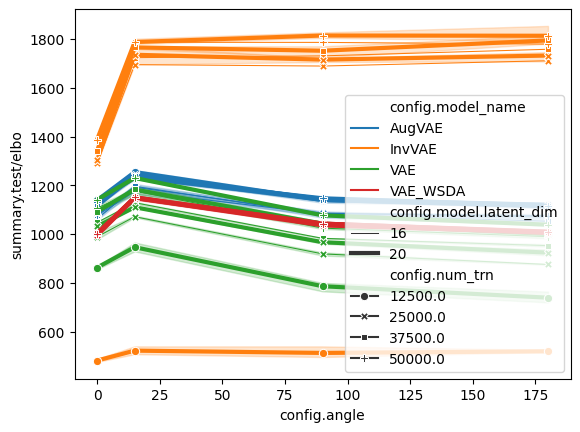

In [18]:
sns.lineplot(
    data=df.reset_index(),
    x="config.angle", 
    y="summary.test/elbo",
    hue='config.model_name',
    style='config.num_trn',
    size='config.model.latent_dim',
    markers=True,
    dashes=False)

In [19]:
# pivot the data frame so that each of the metrics is a column, and the values are the corresponding values
plot_df = df.reset_index().melt(
    id_vars=['config.angle', 'config.num_trn', 'config.model_name', 'config.seed', 'config.model.latent_dim'],
    # value_vars=['summary.test/elbo', 'summary.test/ll', 'summary.test/x_mse', 'summary.test/iwlb'],
    var_name='metric',
    value_name='value'
)
plot_df

,config.angle,config.num_trn,config.model_name,config.seed,config.model.latent_dim,metric,value
0,0.0,12500.0,AugVAE,0.0,20,summary.test/elbo,1133.543701
1,0.0,12500.0,AugVAE,1.0,20,summary.test/elbo,1131.833008
2,0.0,12500.0,AugVAE,2.0,20,summary.test/elbo,1149.792480
3,0.0,12500.0,InvVAE,0.0,20,summary.test/elbo,488.687622
4,0.0,12500.0,InvVAE,1.0,20,summary.test/elbo,480.197327
...,...,...,...,...,...,...,...
1099,180.0,50000.0,VAE,2.0,16,summary.test/iwlb,1032.450317
1100,180.0,50000.0,VAE,2.0,20,summary.test/iwlb,1090.600098
1101,180.0,50000.0,VAE_WSDA,0.0,20,summary.test/iwlb,1028.782104
1102,180.0,50000.0,VAE_WSDA,1.0,20,summary.test/iwlb,1025.837891


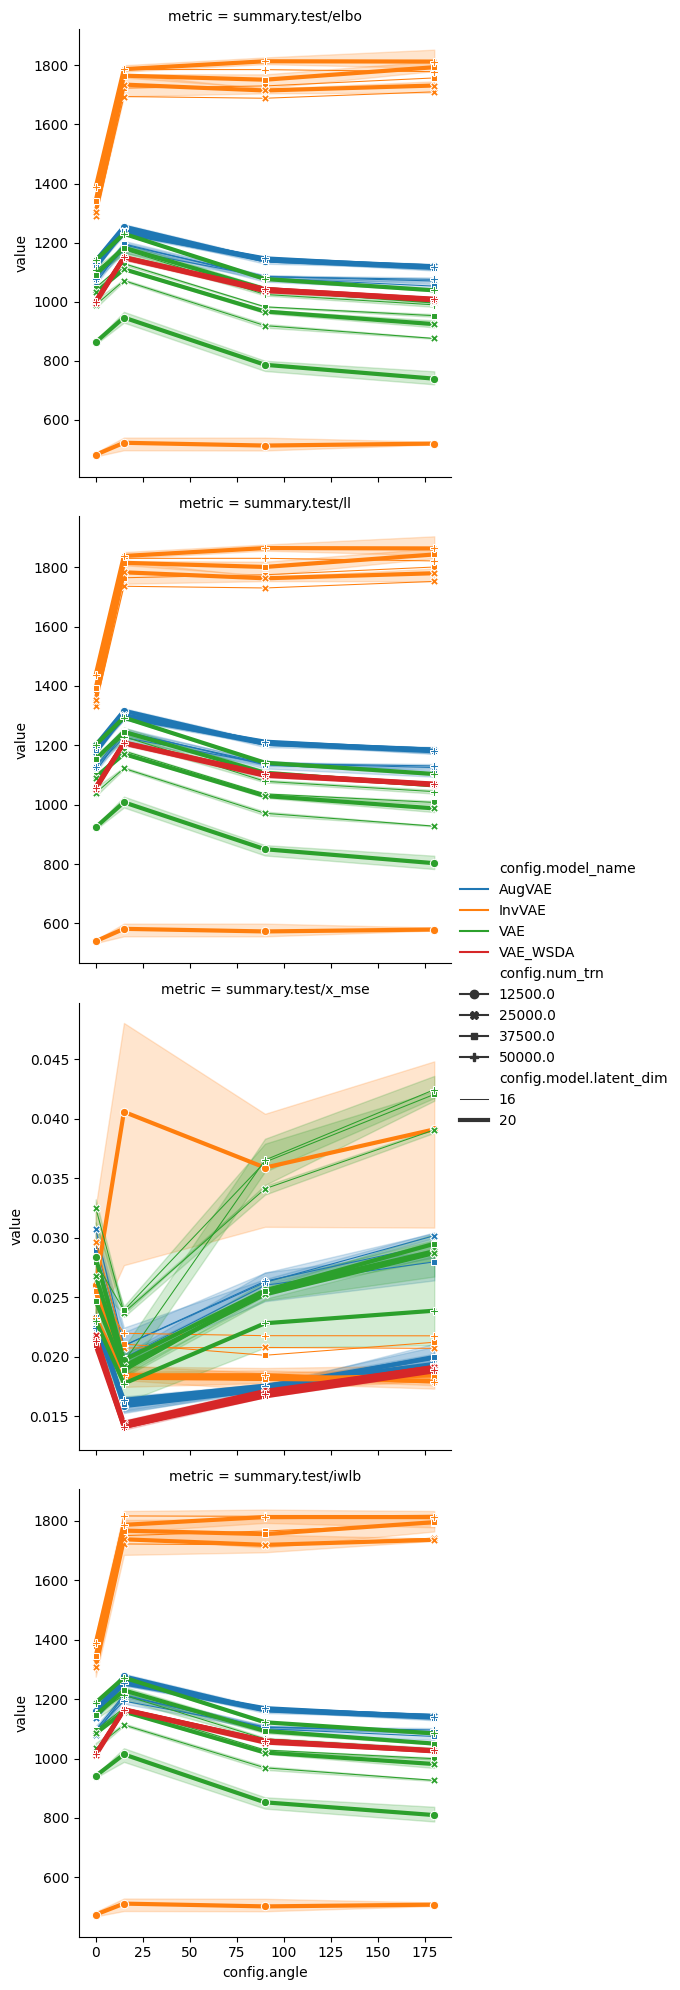

In [20]:
sns.relplot(
    data=plot_df,
    x="config.angle",
    y="value",
    row='metric',
    hue='config.model_name',
    style='config.num_trn',
    size='config.model.latent_dim',
    markers=True,
    dashes=False,
    kind='line',
    facet_kws={
        'sharey': False,
        'sharex': True,
    },
)

### Paper Plot

In [21]:
import matplotlib

text_width = 5.50107 #6.75  # in  --> Confirmed with template explanation
dpi = 300

fs_m1 = 6  # for figure ticks
fs = 8  # for regular figure text
fs_p1 = 9  #  figure titles

matplotlib.rc("font", size=fs)  # controls default text sizes
matplotlib.rc("axes", titlesize=fs)  # fontsize of the axes title
matplotlib.rc("axes", labelsize=fs)  # fontsize of the x and y labels
matplotlib.rc("xtick", labelsize=fs_m1)  # fontsize of the tick labels
matplotlib.rc("ytick", labelsize=fs_m1)  # fontsize of the tick labels
matplotlib.rc("legend", fontsize=fs_m1)  # legend fontsize
matplotlib.rc(
    "figure", titlesize=fs_p1, dpi=dpi, autolayout=False
)  # fontsize of the figure
matplotlib.rc("lines", linewidth=1, markersize=3)
# matplotlib.rc("savefig", dpi=1200)
matplotlib.rc("grid", alpha=0.3)
matplotlib.rc("axes", grid=True)

matplotlib.rc("font", **{"family": "serif", "serif": ["Palatino"]})
matplotlib.rc("text", usetex=True)

In [22]:
run_ids = [
    '6obewdo1',  # 0 15 25k
    'vnujbxxv',  # 0 15 37k5
    '8d09de7v',  # 0 15 50k
    's1rqi67h',  # 0 90 25k
    '2vask25n',  # 0 90 37k5
    'p2r0n5ym',  # 0 90 50k
    '5z669qqs',  # 0 180 25k
    'vy8gm8fl',  # 0 180 37k5
    '1jw5mkkt', # 0 180 50k
]


summary_list, config_list, name_list, tags, ids, states = [], [], [], [], [], []

for run_id in run_ids: 
    run = api.run(entity + "/" + project + "/" + run_id)

    # .summary contains the output keys/values for metrics like accuracy.
    #  We call ._json_dict to omit large files 
    summary_list.append(run.summary._json_dict)

    # .config contains the hyperparameters.
    #  We remove special values that start with _.
    config_list.append(
        {k: v for k,v in run.config.items()
        if not k.startswith('_')})

    # .name is the human-readable name of the run.
    name_list.append(run.name)

    tags.append(run.tags)

    ids.append(run.id)

    states.append(run.state)

inv_runs_df = pd.DataFrame({
    "summary": summary_list,
    "config": config_list,
    "name": name_list,
    "tags": tags,
    "id": ids,
    "state": states,
    })


inv_runs_df = inv_runs_df.join(pd.json_normalize(inv_runs_df['summary'], record_prefix='summary.').add_prefix('summary.')).drop('summary', axis='columns')
inv_runs_df = inv_runs_df.join(pd.json_normalize(inv_runs_df['config'], record_prefix='config').add_prefix('config.')).drop('config', axis='columns')

inv_runs_df = inv_runs_df[[
    'config.angle', 'config.num_trn', 'config.model_name', 'config.seed', 'config.model.latent_dim',
    'summary.test/elbo', 'summary.test/ll', 'summary.test/x_mse', 'summary.test/iwlb'
]]

inv_runs_df

,config.angle,config.num_trn,config.model_name,config.seed,config.model.latent_dim,summary.test/elbo,summary.test/ll,summary.test/x_mse,summary.test/iwlb
0,15,25000,InvVAE,0,20,1734.719116,1780.023315,0.019186,1714.886230
1,15,37500,InvVAE,0,20,1765.882935,1815.032227,0.018123,1750.732544
2,15,50000,InvVAE,0,20,1795.471436,1845.535278,0.018058,1777.377319
3,90,25000,InvVAE,0,20,1719.920288,1766.212646,0.018338,1701.569702
4,90,37500,InvVAE,0,20,1768.403931,1816.453857,0.019071,1753.154297
5,90,50000,InvVAE,0,20,1801.821045,1852.391846,0.018790,1784.458862
6,180,25000,InvVAE,0,20,1698.209473,1741.862427,0.019408,1675.866699
7,180,37500,InvVAE,0,20,1786.940430,1836.010254,0.018904,1772.189331
8,180,50000,InvVAE,0,20,1798.117432,1846.916260,0.017514,1780.753296


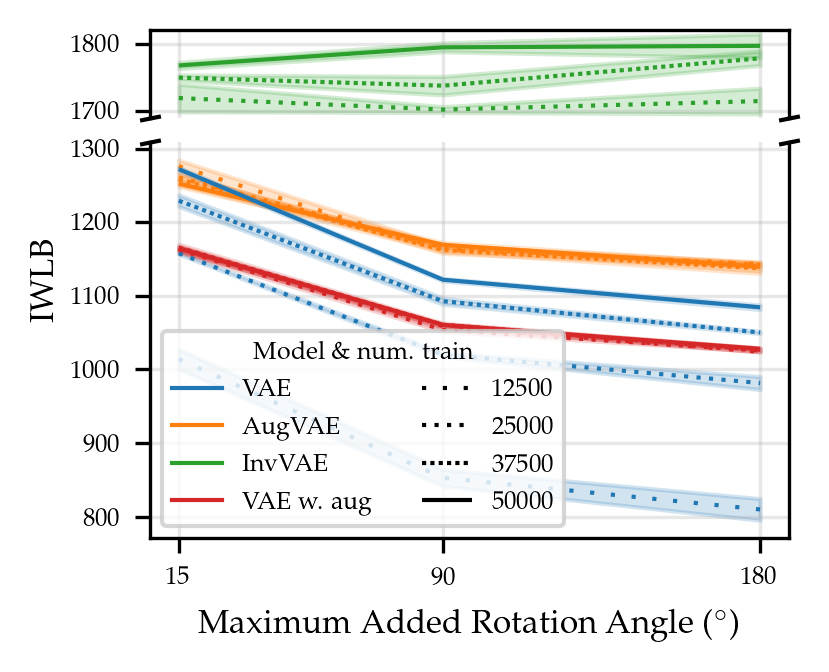

In [39]:
fig = plt.figure(figsize=(text_width * 0.5, text_width * 0.4), layout='none')
gs = fig.add_gridspec(
    2, 1, 
    wspace=0.35, hspace=0.1,
    height_ratios=[1, 4.5],
)
ax1a = fig.add_subplot(gs[0, 0])
ax1b = fig.add_subplot(gs[1, 0], sharex=ax1a)

tmp_df = df.reset_index()

tmp_df = tmp_df[~((tmp_df['config.model_name'] == 'InvVAE') & (tmp_df['config.seed'] == 0))]# & (tmp_df['config.num_trn'] != 12_500)
# now add the rows from inv_runs_df
tmp_df = pd.concat([tmp_df, inv_runs_df], ignore_index=True)

# remove rows with model = invvae and num_trn = 12_500
tmp_df = tmp_df[~((tmp_df['config.model_name'] == 'InvVAE') & (tmp_df['config.num_trn'] == 12_500))]

# plot only config.model.latent_dim == 20
tmp_df = tmp_df[tmp_df['config.model.latent_dim'] == 20]
tmp_df = tmp_df[tmp_df['config.angle'] > 0]
# rename the column config.model_name to Model and config.num_trn to N. train
tmp_df = tmp_df.rename(columns={'config.model_name': 'Model', 'config.num_trn': 'N. train'})


colors = {
    'VAE': 'tab:blue',
    'AugVAE': 'tab:orange',
    'InvVAE': 'tab:green',
    'VAE_WSDA': 'tab:red',
}
markers = {
    12_500: 'X',
    25_000: 'X',
    37_500: 'X',
    50_000: 'X',
}
dashes = {
    12_500: (1, 4),
    25_000: (1, 2),
    37_500: (1, 1),
    50_000: (1, 0),
}

# first plot the test ELBO
# ax0_twin = ax[0].twinx()
g1 = sns.lineplot(
    data=tmp_df[(tmp_df['Model'] == 'InvVAE')],
    x="config.angle",
    y="summary.test/iwlb",
    hue='Model',
    style='N. train',
    dashes=dashes,
    ax=ax1a,
    legend=False,
    palette=colors,
    markersize=3,
    errorbar='se',
)

g2 = sns.lineplot(
    data=tmp_df[(tmp_df['Model'] != 'InvVAE')],
    x="config.angle",
    y="summary.test/iwlb",
    hue='Model',
    style='N. train',
    dashes=dashes,
    ax=ax1b,
    legend=False,
    palette=colors,
    markersize=3,
    errorbar='se',
)         

# only show x-ticks for the values in the data frame
ax1a.set_xticks(tmp_df['config.angle'].unique())

# remove the x-labels and replace with a shared x-label
ax1a.set_xlabel(None)
ax1b.set_xlabel('Maximum Added Rotation Angle ($^\circ$)')

ax1a.set_ylabel(None)
ax1b.set_ylabel(None)
fig.text(0., 0.5, "IWLB", ha="center", va="center", rotation=90)
# # ax0_twin.set_ylabel('')
# # ax1_twin.set_ylabel('MSE (InvVAE)')

# ax0_twin.yaxis.label.set_color('tab:green')
# ax0_twin.tick_params(axis="y", colors="tab:green")
# # set y-range of the twin axis
# ax0_twin.set_ylim(1400, 1850)
# ax0_twin.grid(False)

# ax1_twin.yaxis.label.set_color('tab:green')
# ax1_twin.tick_params(axis="y", colors="tab:green")
# ax1_twin.grid(False)


# hide the spines between 1a and 1b
ax1a.spines.bottom.set_visible(False)
ax1b.spines.top.set_visible(False)
ax1a.xaxis.tick_top()
ax1a.tick_params(labeltop=False)  # don't put tick labels at the top
ax1b.xaxis.tick_bottom()

# remove the ticks markers for the top plot, but also don't put them on top
ax1a.tick_params(axis='x', which='both', length=0)

# set the y-axis ticks for ax1a
# ax1a.set_yticks([1700])

# set the y-axis minimum for ax1b
# ax1b.set_ylim(bottom=750)

# Now, let's turn towards the cut-out slanted lines.
# We create line objects in axes coordinates, in which (0,0), (0,1),
# (1,0), and (1,1) are the four corners of the axes.
# The slanted lines themselves are markers at those locations, such that the
# lines keep their angle and position, independent of the axes size or scale
# Finally, we need to disable clipping.
d = .2  # proportion of vertical to horizontal extent of the slanted line
kwargs = dict(marker=[(-1, -d), (1, d)], markersize=5,
              linestyle="none", color='k', mec='k', mew=1, clip_on=False)
ax1a.plot([0, 1], [0, 0], transform=ax1a.transAxes, **kwargs)
ax1b.plot([0, 1], [1, 1], transform=ax1b.transAxes, **kwargs)

# manually add the legend(s)
# legend for model colors
ax1b.legend(
    handles=[matplotlib.lines.Line2D([0], [0], color=colors[model], linestyle='-', label=model if model != 'VAE_WSDA' else 'VAE w. aug') for model in colors.keys()] + [matplotlib.lines.Line2D([0], [0], color='black', dashes=dashes[num_trn], label=f'{num_trn}') for num_trn in dashes.keys()], 
    loc='lower left', ncol=2, title='Model \& num. train',
    title_fontsize=fs_m1,
)


# save the figure
# fig.set_layout_engine('none')
# plt.subplots_adjust(bottom=0.01)
# plt.gcf().set_size_inches(text_width, text_width * 0.3)
plt.savefig('rotated_mnist_smol.pdf', dpi=300, pad_inches=0.01, bbox_inches='tight')
# from matplotlib.transforms import Bbox
# plt.savefig('rotated_mnist.pdf', dpi=300, pad_inches=0.01, bbox_inches=Bbox([[0., 0.], [text_width, text_width * 0.3]]))
# plt.imsave('rotated_mnist.pdf', dpi=300)

plt.show()

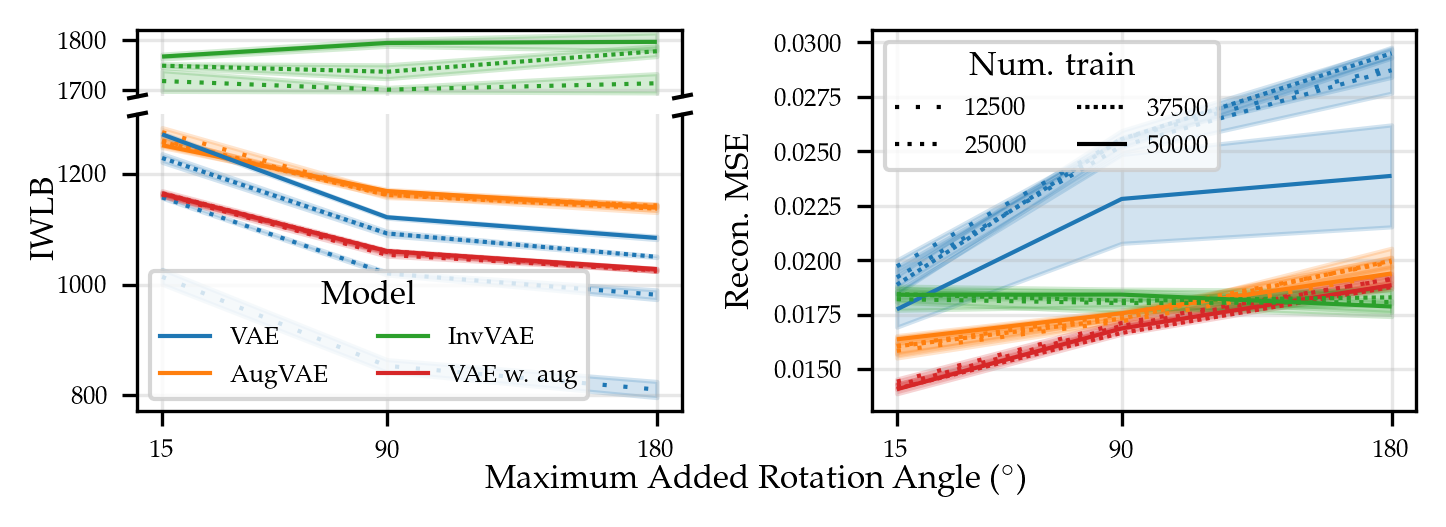

In [37]:
fig = plt.figure(figsize=(text_width, text_width * 0.3), layout='none')
gs = fig.add_gridspec(
    2, 2, 
    wspace=0.35, hspace=0.1,
    height_ratios=[1, 4.5], width_ratios=[1, 1],
)
ax1a = fig.add_subplot(gs[0, 0])
ax1b = fig.add_subplot(gs[1, 0], sharex=ax1a)
ax2 = fig.add_subplot(gs[:, 1], sharex=ax1a)

tmp_df = df.reset_index()

tmp_df = tmp_df[~((tmp_df['config.model_name'] == 'InvVAE') & (tmp_df['config.seed'] == 0))]# & (tmp_df['config.num_trn'] != 12_500)
# now add the rows from inv_runs_df
tmp_df = pd.concat([tmp_df, inv_runs_df], ignore_index=True)

# remove rows with model = invvae and num_trn = 12_500
tmp_df = tmp_df[~((tmp_df['config.model_name'] == 'InvVAE') & (tmp_df['config.num_trn'] == 12_500))]

# plot only config.model.latent_dim == 20
tmp_df = tmp_df[tmp_df['config.model.latent_dim'] == 20]
tmp_df = tmp_df[tmp_df['config.angle'] > 0]
# rename the column config.model_name to Model and config.num_trn to N. train
tmp_df = tmp_df.rename(columns={'config.model_name': 'Model', 'config.num_trn': 'N. train'})


colors = {
    'VAE': 'tab:blue',
    'AugVAE': 'tab:orange',
    'InvVAE': 'tab:green',
    'VAE_WSDA': 'tab:red',
}
markers = {
    12_500: 'X',
    25_000: 'X',
    37_500: 'X',
    50_000: 'X',
}
dashes = {
    12_500: (1, 4),
    25_000: (1, 2),
    37_500: (1, 1),
    50_000: (1, 0),
}

# first plot the test ELBO
# ax0_twin = ax[0].twinx()
g1 = sns.lineplot(
    data=tmp_df[(tmp_df['Model'] == 'InvVAE')],
    x="config.angle",
    y="summary.test/iwlb",
    hue='Model',
    style='N. train',
    dashes=dashes,
    ax=ax1a,
    legend=False,
    palette=colors,
    markersize=3,
    errorbar='se',
)

g2 = sns.lineplot(
    data=tmp_df[(tmp_df['Model'] != 'InvVAE')],
    x="config.angle",
    y="summary.test/iwlb",
    hue='Model',
    style='N. train',
    dashes=dashes,
    ax=ax1b,
    legend=False,
    palette=colors,
    markersize=3,
    errorbar='se',
)

sns.lineplot(
    data=tmp_df,
    x="config.angle",
    y="summary.test/x_mse",
    hue='Model',
    style='N. train',
    dashes=dashes,
    ax=ax2,
    legend=False,
    palette=colors,
    markersize=3,
    errorbar='se',
)

# set the legend to have two columns
# ax2.legend(ncol=2, loc='upper center', 
#              bbox_to_anchor=(.36, 1.)
#              )

# only show x-ticks for the values in the data frame
ax1a.set_xticks(tmp_df['config.angle'].unique())

# remove the x-labels and replace with a shared x-label
ax1a.set_xlabel(None)
ax1b.set_xlabel(None)
# ax0_twin.set_xlabel('')
ax2.set_xlabel('')
# ax1_twin.set_xlabel('')
# add shared x sup label
fig.text(0.5, -0.03, 'Maximum Added Rotation Angle ($^\circ$)', ha='center', va='center')

ax1a.set_ylabel(None)
ax1b.set_ylabel(None)
fig.text(0.07, 0.5, "IWLB", ha="center", va="center", rotation=90)
# # ax0_twin.set_ylabel('')
ax2.set_ylabel('Recon. MSE')
# # ax1_twin.set_ylabel('MSE (InvVAE)')

# ax0_twin.yaxis.label.set_color('tab:green')
# ax0_twin.tick_params(axis="y", colors="tab:green")
# # set y-range of the twin axis
# ax0_twin.set_ylim(1400, 1850)
# ax0_twin.grid(False)

# ax1_twin.yaxis.label.set_color('tab:green')
# ax1_twin.tick_params(axis="y", colors="tab:green")
# ax1_twin.grid(False)


# hide the spines between 1a and 1b
ax1a.spines.bottom.set_visible(False)
ax1b.spines.top.set_visible(False)
ax1a.xaxis.tick_top()
ax1a.tick_params(labeltop=False)  # don't put tick labels at the top
ax1b.xaxis.tick_bottom()

# remove the ticks markers for the top plot, but also don't put them on top
ax1a.tick_params(axis='x', which='both', length=0)

# set the y-axis ticks for ax1a
# ax1a.set_yticks([1700])

# set the y-axis minimum for ax1b
# ax1b.set_ylim(bottom=750)

# Now, let's turn towards the cut-out slanted lines.
# We create line objects in axes coordinates, in which (0,0), (0,1),
# (1,0), and (1,1) are the four corners of the axes.
# The slanted lines themselves are markers at those locations, such that the
# lines keep their angle and position, independent of the axes size or scale
# Finally, we need to disable clipping.
d = .2  # proportion of vertical to horizontal extent of the slanted line
kwargs = dict(marker=[(-1, -d), (1, d)], markersize=5,
              linestyle="none", color='k', mec='k', mew=1, clip_on=False)
ax1a.plot([0, 1], [0, 0], transform=ax1a.transAxes, **kwargs)
ax1b.plot([0, 1], [1, 1], transform=ax1b.transAxes, **kwargs)

# manually add the legend(s)
# legend for model colors
ax1b.legend(
    handles=[matplotlib.lines.Line2D([0], [0], color=colors[model], linestyle='-', label=model if model != 'VAE_WSDA' else 'VAE w. aug') for model in colors.keys()], 
    loc='lower left', ncol=2, title='Model' 
)
# legend for training data line styles
ax2.legend(
    handles=[matplotlib.lines.Line2D([0], [0], color='black', dashes=dashes[num_trn], label=f'{num_trn}') for num_trn in dashes.keys()], 
    loc='upper left', ncol=2, title='Num. train'
)


# save the figure
# fig.set_layout_engine('none')
# plt.subplots_adjust(bottom=0.01)
# plt.gcf().set_size_inches(text_width, text_width * 0.3)
plt.savefig('rotated_mnist.pdf', dpi=300, pad_inches=0.01, bbox_inches='tight')
# from matplotlib.transforms import Bbox
# plt.savefig('rotated_mnist.pdf', dpi=300, pad_inches=0.01, bbox_inches=Bbox([[0., 0.], [text_width, text_width * 0.3]]))
# plt.imsave('rotated_mnist.pdf', dpi=300)

plt.show()

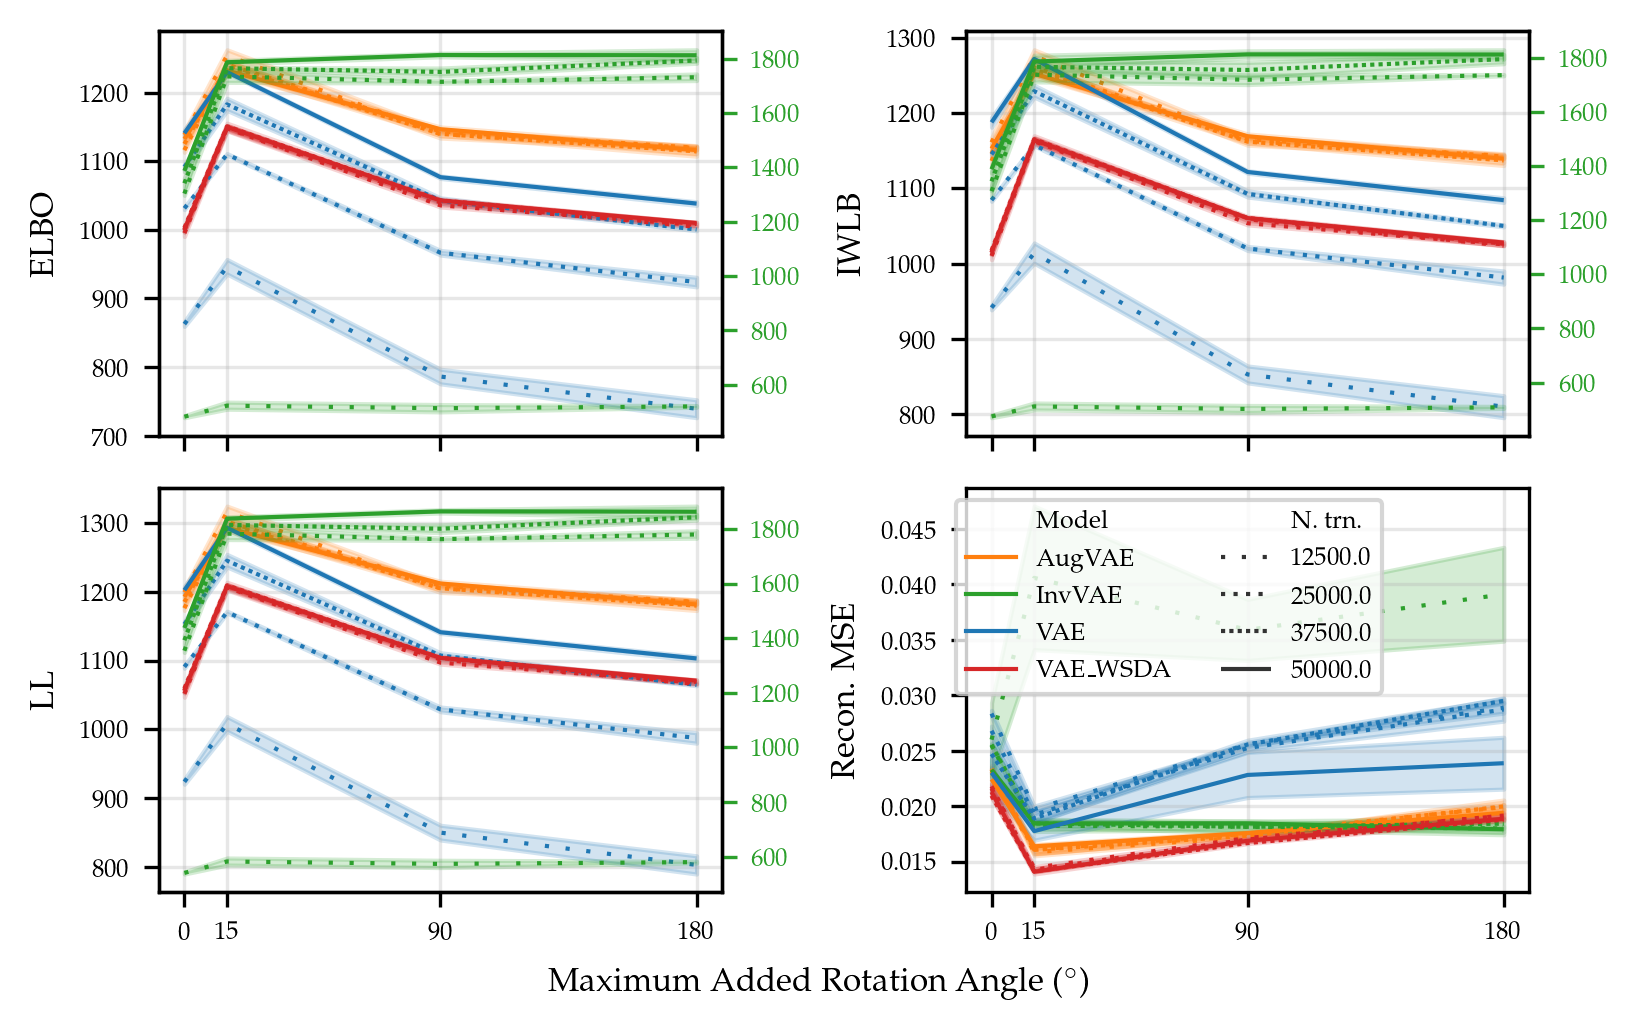

In [24]:
# make a matplotlib figure with two columns
fig, ax = plt.subplots(
    2,
    2,
    figsize=(text_width, text_width * 0.3 * 2),
    sharex=True,
    # sharey=True,
    # gridspec_kw={"wspace": 0.05, "hspace": 0.05},
)

tmp_df = df.reset_index()
# plot only config.model.latent_dim == 20
tmp_df = tmp_df[tmp_df['config.model.latent_dim'] == 20]
# rename the column config.model_name to Model and config.num_trn to N. trn.
tmp_df = tmp_df.rename(columns={'config.model_name': 'Model', 'config.num_trn': 'N. trn.'})


# first plot the test ELBO
ax00_twin = ax[0, 0].twinx()
sns.lineplot(
    data=tmp_df[tmp_df['Model'] == 'InvVAE'],
    x="config.angle",
    y="summary.test/elbo",
    hue='Model',
    style='N. trn.',
    dashes=dashes,
    ax=ax00_twin,
    legend=False,
    palette=colors,
    # markers=markers,
    markersize=3,
    # alpha=0.66,
    errorbar='se',
)

sns.lineplot(
    data=tmp_df[tmp_df['Model'] != 'InvVAE'],
    x="config.angle",
    y="summary.test/elbo",
    hue='Model',
    style='N. trn.',
    dashes=dashes,
    ax=ax[0, 0],
    legend=False,
    palette=colors,
    # markers=markers,
    markersize=3,
    # alpha=0.66,
    errorbar='se',
)

# then plot the test IWLB
ax01_twin = ax[0, 1].twinx()
sns.lineplot(
    data=tmp_df[tmp_df['Model'] == 'InvVAE'],
    x="config.angle",
    y="summary.test/iwlb",
    hue='Model',
    style='N. trn.',
    dashes=dashes,
    ax=ax01_twin,
    legend=False,
    palette=colors,
    # markers=markers,
    markersize=3,
    # alpha=0.66,
    errorbar='se',
)

sns.lineplot(
    data=tmp_df[tmp_df['Model'] != 'InvVAE'],
    x="config.angle",
    y="summary.test/iwlb",
    hue='Model',
    style='N. trn.',
    dashes=dashes,
    ax=ax[0, 1],
    legend=False,
    palette=colors,
    # markers=markers,
    markersize=3,
    # alpha=0.66,
    errorbar='se',
)

# then plot the test LL
ax10_twin = ax[1, 0].twinx()
sns.lineplot(
    data=tmp_df[tmp_df['Model'] == 'InvVAE'],
    x="config.angle",
    y="summary.test/ll",
    hue='Model',
    style='N. trn.',
    dashes=dashes,
    ax=ax10_twin,
    legend=False,
    palette=colors,
    # markers=markers,
    markersize=3,
    # alpha=0.66,
    errorbar='se',
)

sns.lineplot(
    data=tmp_df[tmp_df['Model'] != 'InvVAE'],
    x="config.angle",
    y="summary.test/ll",
    hue='Model',
    style='N. trn.',
    dashes=dashes,
    ax=ax[1, 0],
    legend=False,
    palette=colors,
    # markers=markers,
    markersize=3,
    # alpha=0.66,
    errorbar='se',
)

# then x mse
sns.lineplot(
    data=tmp_df,
    x="config.angle",
    y="summary.test/x_mse",
    hue='Model',
    style='N. trn.',
    dashes=dashes,
    ax=ax[1, 1],
    legend=True,
    palette=colors,
    # markers=markers,
    markersize=3,
    errorbar='se',
)

# set the legend to have two columns
ax[1, 1].legend(ncol=2, loc='upper center', 
             bbox_to_anchor=(.36, 1.)
             )

# only show x-ticks for the values in the data frame
ax[0, 0].set_xticks(tmp_df['config.angle'].unique())

# remove the x-labels and replace with a shared x-label
ax[0, 0].set_xlabel('')
ax00_twin.set_xlabel('')
ax[1, 1].set_xlabel('')
ax[0, 1].set_xlabel('')
ax[1, 0].set_xlabel('')
# ax1_twin.set_xlabel('')
# add shared x sup label
fig.text(0.5, 0.0, 'Maximum Added Rotation Angle ($^\circ$)', ha='center', va='center')

ax[0, 0].set_ylabel('ELBO')
ax00_twin.set_ylabel('')
ax[0, 1].set_ylabel('IWLB')
ax01_twin.set_ylabel('')
ax[1, 0].set_ylabel('LL')
ax10_twin.set_ylabel('')
ax[1, 1].set_ylabel('Recon. MSE')
# ax1_twin.set_ylabel('MSE (InvVAE)')

ax00_twin.yaxis.label.set_color('tab:green')
ax00_twin.tick_params(axis="y", colors="tab:green")
ax00_twin.grid(False)

ax01_twin.yaxis.label.set_color('tab:green')
ax01_twin.tick_params(axis="y", colors="tab:green")
ax01_twin.grid(False)

ax10_twin.yaxis.label.set_color('tab:green')
ax10_twin.tick_params(axis="y", colors="tab:green")
ax10_twin.grid(False)

# ax1_twin.yaxis.label.set_color('tab:green')
# ax1_twin.tick_params(axis="y", colors="tab:green")
# ax1_twin.grid(False)

# add a shared title
# fig.suptitle('Rotated MNIST')


plt.tight_layout()

# save the figure
plt.savefig('rotated_mnist_full.pdf', bbox_inches='tight', dpi=300, pad_inches=0.01)

plt.show()

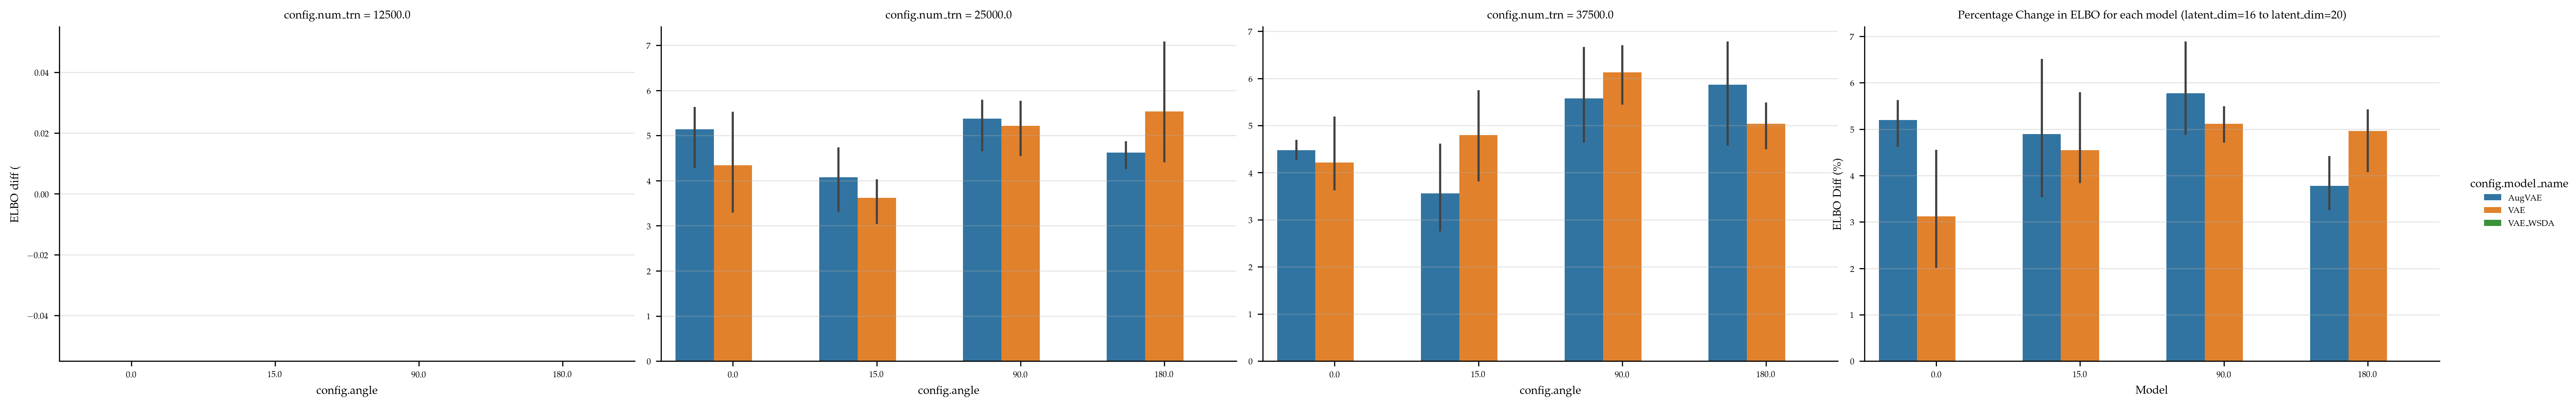

In [25]:
diff_df = df.reset_index()
diff_df = diff_df[diff_df['config.model_name'] != 'InvVAE']

# Calculate the percentage drop in ELBO for each model
diff_df['ELBO diff (%)'] = (diff_df.groupby(['config.model_name', 'config.num_trn', 'config.angle', 'config.seed'])['summary.test/elbo'].diff() / diff_df['summary.test/elbo'].shift()) * 100


diff_df = diff_df[diff_df['config.model.latent_dim'] == 20]

# Create the bar plot
sns.catplot(data=diff_df, x='config.angle', y='ELBO diff (%)', hue='config.model_name', col='config.num_trn', kind='bar', height=4, aspect=1.5, sharey=False, sharex=True)

# Set the plot title and labels
plt.title('Percentage Change in ELBO for each model (latent_dim=16 to latent_dim=20)')
plt.xlabel('Model')
plt.ylabel('ELBO Diff (\%)')

# Show the plot
plt.show()


### Galaxy MNIST result

In [40]:
run_ids = [
    '5desu2ep', # VAE 0 7k
    'ov6vtd16', # VAE 1 7k
    'jyqgv3f9', # VAE 2 7k
    '40c22h0a', # VAE 0 3k5
    '7z8xhk9l', # VAE 1 3k5
    'zirz5wfl', # VAE 2 3k5
    'uhfslr3b', # AugVAE 0 7k
    'e9oizq82', # AugVAE 1 7k
    '88zafbto', # AugVAE 2 7k
    'mytr9pcl', # AugVAE 0 3k5
    'sa9x2wsh', # AugVAE 1 3k5
    '8wl42y7m', # AugVAE 2 3k5
]


summary_list, config_list, name_list, tags, ids, states = [], [], [], [], [], []

for run_id in run_ids: 
    run = api.run(entity + "/" + project + "/" + run_id)

    # .summary contains the output keys/values for metrics like accuracy.
    #  We call ._json_dict to omit large files 
    summary_list.append(run.summary._json_dict)

    # .config contains the hyperparameters.
    #  We remove special values that start with _.
    config_list.append(
        {k: v for k,v in run.config.items()
        if not k.startswith('_')})

    # .name is the human-readable name of the run.
    name_list.append(run.name)

    tags.append(run.tags)

    ids.append(run.id)

    states.append(run.state)

galaxy_runs_df = pd.DataFrame({
    "summary": summary_list,
    "config": config_list,
    "name": name_list,
    "tags": tags,
    "id": ids,
    "state": states,
    })


galaxy_runs_df = galaxy_runs_df.join(pd.json_normalize(galaxy_runs_df['summary'], record_prefix='summary.').add_prefix('summary.')).drop('summary', axis='columns')
galaxy_runs_df = galaxy_runs_df.join(pd.json_normalize(galaxy_runs_df['config'], record_prefix='config').add_prefix('config.')).drop('config', axis='columns')

galaxy_runs_df = galaxy_runs_df[[
    'config.num_trn', 'config.model_name', 'config.seed', 'config.model.latent_dim',
    'summary.test/elbo', 'summary.test/ll', 'summary.test/x_mse', 'summary.test/iwlb'
]]

galaxy_runs_df

,config.num_trn,config.model_name,config.seed,config.model.latent_dim,summary.test/elbo,summary.test/ll,summary.test/x_mse,summary.test/iwlb
0,7000,VAE,0,20,10743.013672,10814.551758,0.009401,10950.567383
1,7000,VAE,1,20,11172.660156,11239.777344,0.009318,11363.404297
2,7000,VAE,2,20,10586.913086,10662.097656,0.009015,10818.731445
3,3500,VAE,0,20,8941.827148,9021.020508,0.010059,9201.563477
4,3500,VAE,1,20,8294.899414,8374.010742,0.010268,8555.270508
5,3500,VAE,2,20,10653.532227,10721.003906,0.009902,10865.968750
6,7000,AugVAE,0,20,12827.087891,12903.112305,0.006975,12932.594727
7,7000,AugVAE,1,20,12717.625977,12791.247070,0.007058,12818.574219
8,7000,AugVAE,2,20,12813.467773,12887.085938,0.007008,12914.560547
9,3500,AugVAE,0,20,12372.989258,12447.400391,0.007345,12492.141602


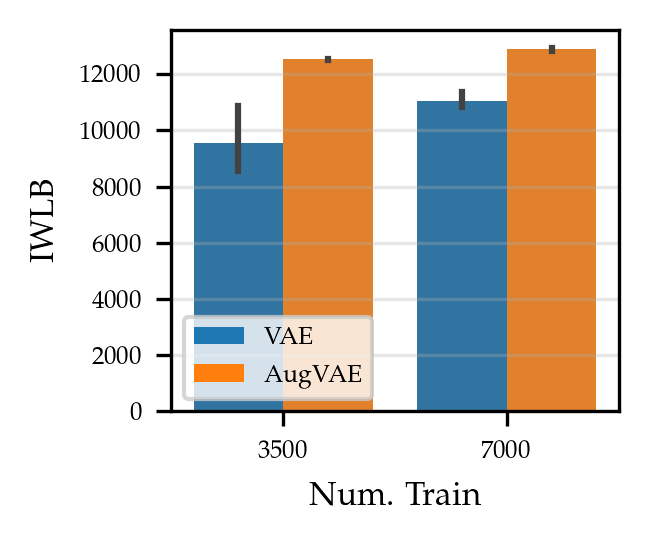

In [42]:
# create a bar plot of the IWLB for each model
# x-axis: num_trn
# color: model_name
# y-axis: iwlb

fig, ax = plt.subplots(
    1,
    1,
    figsize=(text_width * 0.35, text_width * 0.3),
    dpi=300
)

g = sns.barplot(data=galaxy_runs_df, x='config.num_trn', y='summary.test/iwlb', hue='config.model_name', ax=ax, legend=False)

# construct the legend manually
# legend for model colors, with blocks instead of lines to indicate color
ax.legend(
    handles=[matplotlib.patches.Patch(facecolor=colors[model], label=model) for model in ['VAE', 'AugVAE']],
    loc='lower left', ncol=1
)

# set the x-axis label
ax.set_xlabel('Num. Train')
# set the y-axis label
ax.set_ylabel('IWLB')

plt.savefig('galaxy_iwlb.pdf', dpi=300, pad_inches=0.01, bbox_inches='tight')

plt.show()